In [66]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Cinema_Audience_Forecasting_challenge/movie_theater_id_relation/movie_theater_id_relation.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/date_info/date_info.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/sample_submission/sample_submission.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_theaters/booknow_theaters.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_booking/cinePOS_booking.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_theaters/cinePOS_theaters.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_visits/booknow_visits.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_booking/booknow_booking.csv


# Cinema Audience Forecasting challenge
***Predict daily theatre audience counts across multiple locations.***

* cinePOS_theaters.csv – CinePOS theatre info
* booknow_theaters.csv – BookNow theatre info
* movie_theater_id_relation.csv – Mapping between BookNow and CinePOS theatres.
* cinePOS_booking.csv – CinePOS bookings
* booknow_booking.csv – BookNow bookings
* booknow_visits.csv – Daily audience counts
* date_info.csv – Calendar info
* sample_submission.csv – Submission format (ID = book_theater_id + show_date, audience_count).

# Loading csv files

In [67]:
# Reading the .csv files one by one
movie_id = pd.read_csv(r"/kaggle/input/Cinema_Audience_Forecasting_challenge/movie_theater_id_relation/movie_theater_id_relation.csv")
dates_info = pd.read_csv(r"/kaggle/input/Cinema_Audience_Forecasting_challenge/date_info/date_info.csv")
sample_subm = pd.read_csv(r"/kaggle/input/Cinema_Audience_Forecasting_challenge/sample_submission/sample_submission.csv")
booknow_th = pd.read_csv(r"/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_theaters/booknow_theaters.csv")
cinepos_book = pd.read_csv(r"/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_booking/cinePOS_booking.csv")
cinepos_th = pd.read_csv(r"/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_theaters/cinePOS_theaters.csv")
booknow_visit = pd.read_csv(r"/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_visits/booknow_visits.csv")
booknow_book = pd.read_csv(r"/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_booking/booknow_booking.csv")

# Dataset inspection

In [68]:
movie_id.tail()

,book_theater_id,cine_theater_id
145,book_00363,cinePOS_09012
146,book_00042,cinePOS_02789
147,book_00746,cinePOS_09057
148,book_00625,cinePOS_05648
149,book_00222,cinePOS_06697


In [69]:
dates_info.tail()

,show_date,day_of_week
542,2024-06-26,Wednesday
543,2024-06-27,Thursday
544,2024-06-28,Friday
545,2024-06-29,Saturday
546,2024-06-30,Sunday


In [70]:
sample_subm.tail()

,ID,audience_count
38057,book_00829_2024-04-18,0
38058,book_00829_2024-04-19,0
38059,book_00829_2024-04-20,0
38060,book_00829_2024-04-21,0
38061,book_00829_2024-04-22,0


In [71]:
booknow_th.tail()

,book_theater_id,theater_type,theater_area,latitude,longitude
824,NaN,Drama,Area_006,23.005894,79.915496
825,NaN,Action,Area_006,23.005894,79.915496
826,book_00305,Action,Area_006,23.005894,79.915496
827,book_00216,Comedy,Area_016,25.963367,80.570258
828,NaN,Comedy,Area_016,25.963367,80.570258


In [72]:
cinepos_book.tail()

,cine_theater_id,show_datetime,booking_datetime,tickets_sold
1641961,cinePOS_02502,2024-02-28 23:00:00,2024-02-28 09:00:00,2
1641962,cinePOS_12483,2024-02-28 23:00:00,2024-02-24 16:00:00,7
1641963,cinePOS_00334,2024-02-28 23:00:00,2024-01-26 18:00:00,1
1641964,cinePOS_06176,2024-02-28 23:00:00,2024-02-21 00:00:00,11
1641965,cinePOS_05713,2024-02-28 23:00:00,2024-02-22 19:00:00,2


In [73]:
cinepos_th.tail()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,cine_theater_id,theater_type,theater_area,latitude,longitude
4685,cinePOS_08203,Other,Area_131,NaN,NaN
4686,cinePOS_04068,Other,Area_100,NaN,NaN
4687,cinePOS_03885,Other,Area_131,NaN,NaN
4688,cinePOS_04204,Other,Area_133,NaN,NaN
4689,cinePOS_00501,Other,Area_145,NaN,NaN


In [74]:
booknow_visit.tail()

,book_theater_id,show_date,audience_count
214041,book_00829,2024-02-23,16
214042,book_00829,2024-02-24,8
214043,book_00829,2024-02-25,16
214044,book_00829,2024-02-27,16
214045,book_00829,2024-02-28,16


In [75]:
booknow_book.tail()

,book_theater_id,show_datetime,booking_datetime,tickets_booked
68331,book_00523,2024-02-28 23:00:00,2024-02-27 19:00:00,7
68332,book_00073,2024-02-28 23:00:00,2024-02-19 07:00:00,6
68333,book_00456,2024-02-28 23:00:00,2024-02-28 22:00:00,2
68334,book_00388,2024-02-28 23:00:00,2024-02-23 16:00:00,8
68335,book_00388,2024-02-28 23:00:00,2024-02-15 23:00:00,8


# Conversion of all dates into python datetime objects

In [76]:
# Converting all dates into datetime objects
dates_info['show_date'] = pd.to_datetime(dates_info['show_date'])
booknow_visit['show_date'] = pd.to_datetime(booknow_visit['show_date']).dt.normalize()
cinepos_book['show_datetime'] = pd.to_datetime(cinepos_book['show_datetime']).dt.normalize()
cinepos_book['booking_datetime'] = pd.to_datetime(cinepos_book['booking_datetime']).dt.normalize()
booknow_book['show_datetime'] = pd.to_datetime(booknow_book['show_datetime']).dt.normalize()
booknow_book['booking_datetime'] = pd.to_datetime(booknow_book['booking_datetime']).dt.normalize()

# Merging and Concatinating the datasets

In [77]:
df_features = booknow_visit.copy()

In [78]:
df_features = df_features.rename(columns={'show_date': 'show_datetime'})
dates_info = dates_info.rename(columns={'show_date':'show_datetime'})

df_features = pd.merge(df_features, dates_info, on='show_datetime', how='left')
df_features = df_features.merge(booknow_th, on=['book_theater_id'], how='left')

In [79]:
# Matching columns from booknow_book and cinepos_book and merging them

booknow_book_new= booknow_book.copy()
booknow_book_new['tickets']=booknow_book_new['tickets_booked']
booknow_book_new['book_date']= booknow_book_new['booking_datetime'].dt.date
booknow_book_new = booknow_book_new[['book_date','book_theater_id','tickets']]

cinepos_book_new = cinepos_book.copy()
cinepos_book_new['tickets'] = cinepos_book_new['tickets_sold']
cinepos_book_new['book_date'] = cinepos_book_new['booking_datetime'].dt.date
cinepos_book_new = cinepos_book_new.merge(movie_id, on='cine_theater_id', how='left')
cinepos_book_new['lead_time_days'] = (cinepos_book_new['show_datetime'] - cinepos_book_new['booking_datetime']).dt.days
cinepos_book_new = cinepos_book_new[['book_theater_id','booking_datetime','show_datetime','tickets','lead_time_days']]

all_booking = pd.concat([booknow_book_new, cinepos_book_new])


In [80]:
same_day_bookings = all_booking[all_booking['booking_datetime'] == all_booking['show_datetime']].groupby(
    ['book_theater_id','show_datetime']
)['tickets'].sum().reset_index(name='same_day_bookings')

# AVG LEAD TIME (overall & POS) 
avg_lead_time = all_booking.groupby(['book_theater_id','show_datetime'])['lead_time_days'].mean().reset_index(name='avg_lead_time')
avg_lead_time_pos = cinepos_book_new.groupby(['book_theater_id','show_datetime'])['lead_time_days'].mean().reset_index(name='avg_lead_time_pos')

#  CINEPOS TICKETS for that show date 
cinepos_tickets = cinepos_book_new.groupby(['book_theater_id','show_datetime'])['tickets'].sum().reset_index(name='cinepos_tickets')

# TOTAL BOOKINGS (lagged feature) 
booking_features = all_booking.groupby(['book_theater_id','booking_datetime']).sum(numeric_only=True).reset_index()
booking_features = booking_features.rename(columns={'tickets':'lagged_tickets'})
booking_features['booking_datetime'] = pd.to_datetime(booking_features['booking_datetime'])
booking_features['new_book_date'] = booking_features['booking_datetime'] + pd.Timedelta(days=1)
booking_features['new_book_date'] = booking_features['new_book_date'].dt.date


df_features['show_datetime'] = pd.to_datetime(df_features['show_datetime'])
booking_features['new_book_date'] = pd.to_datetime(booking_features['new_book_date'])
same_day_bookings['show_datetime'] = pd.to_datetime(same_day_bookings['show_datetime'])
avg_lead_time['show_datetime'] = pd.to_datetime(avg_lead_time['show_datetime'])
avg_lead_time_pos['show_datetime'] = pd.to_datetime(avg_lead_time_pos['show_datetime'])
cinepos_tickets['show_datetime'] = pd.to_datetime(cinepos_tickets['show_datetime'])



df_features = (
    df_features
    .merge(booking_features[['book_theater_id','new_book_date','lagged_tickets']],
            left_on=['book_theater_id','show_datetime'],
            right_on=['book_theater_id','new_book_date'],
            how='left')
    .merge(same_day_bookings, left_on=['book_theater_id','show_datetime'],
            right_on=['book_theater_id','show_datetime'], how='left')
    .merge(avg_lead_time, left_on=['book_theater_id','show_datetime'],
            right_on=['book_theater_id','show_datetime'], how='left')
    .merge(avg_lead_time_pos, left_on=['book_theater_id','show_datetime'],
            right_on=['book_theater_id','show_datetime'], how='left')
    .merge(cinepos_tickets, left_on=['book_theater_id','show_datetime'],
            right_on=['book_theater_id','show_datetime'], how='left')
)


df_features = df_features.drop(columns=['new_book_date','show_date_x','show_date_y'], errors='ignore')
df_features = df_features.fillna(0)

# Rolling 3-day mean of bookings 
df_features = df_features.sort_values(['book_theater_id','show_datetime'])
df_features['rolling_mean_3d'] = (
    df_features.groupby('book_theater_id')['lagged_tickets']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [81]:
df_features

,book_theater_id,show_datetime,audience_count,day_of_week,theater_type,theater_area,latitude,longitude,lagged_tickets,same_day_bookings,avg_lead_time,avg_lead_time_pos,cinepos_tickets,rolling_mean_3d
0,book_00001,2023-01-13,50,Friday,Drama,Area_002,23.00441,79.934515,0.0,0.0,0.0,0.0,0.0,0.0
1,book_00001,2023-01-14,64,Saturday,Drama,Area_002,23.00441,79.934515,0.0,0.0,0.0,0.0,0.0,0.0
2,book_00001,2023-01-15,58,Sunday,Drama,Area_002,23.00441,79.934515,0.0,0.0,0.0,0.0,0.0,0.0
3,book_00001,2023-01-16,44,Monday,Drama,Area_002,23.00441,79.934515,0.0,0.0,0.0,0.0,0.0,0.0
4,book_00001,2023-01-18,12,Wednesday,Drama,Area_002,23.00441,79.934515,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214041,book_00829,2024-02-23,16,Friday,0,0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
214042,book_00829,2024-02-24,8,Saturday,0,0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
214043,book_00829,2024-02-25,16,Sunday,0,0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
214044,book_00829,2024-02-27,16,Tuesday,0,0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


# Idetifying and Handling Missing Values

In [82]:
df_features.isna().sum()

book_theater_id      0
show_datetime        0
audience_count       0
day_of_week          0
theater_type         0
theater_area         0
latitude             0
longitude            0
lagged_tickets       0
same_day_bookings    0
avg_lead_time        0
avg_lead_time_pos    0
cinepos_tickets      0
rolling_mean_3d      0
dtype: int64

In [83]:
df_features.duplicated().sum()

10

In [84]:
df_features = df_features.drop_duplicates(subset=["book_theater_id", "show_datetime"], keep="first")

In [85]:
df_features.duplicated().sum()

0

# EDA

In [86]:
df_features.describe()

,show_datetime,audience_count,latitude,longitude,lagged_tickets,same_day_bookings,avg_lead_time,avg_lead_time_pos,cinepos_tickets,rolling_mean_3d
count,213871,213871.000000,213871.000000,213871.000000,213871.000000,213871.000000,213871.000000,213871.000000,213871.000000,213871.000000
mean,2023-09-13 07:59:43.706065920,41.621968,8.653735,29.560664,0.322437,0.026296,0.337156,0.337156,0.348720,0.323318
min,2023-01-01 00:00:00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2023-07-09 00:00:00,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2023-09-26 00:00:00,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2023-12-11 00:00:00,58.000000,22.625541,78.237796,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2024-02-28 00:00:00,1350.000000,26.349436,81.743235,90.000000,20.000000,90.000000,90.000000,157.000000,31.000000
std,NaN,32.839277,11.201567,38.215391,1.955696,0.326150,2.225447,2.225447,2.268556,1.370815


In [87]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213871 entries, 0 to 214045
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   book_theater_id    213871 non-null  object        
 1   show_datetime      213871 non-null  datetime64[ns]
 2   audience_count     213871 non-null  int64         
 3   day_of_week        213871 non-null  object        
 4   theater_type       213871 non-null  object        
 5   theater_area       213871 non-null  object        
 6   latitude           213871 non-null  float64       
 7   longitude          213871 non-null  float64       
 8   lagged_tickets     213871 non-null  float64       
 9   same_day_bookings  213871 non-null  float64       
 10  avg_lead_time      213871 non-null  float64       
 11  avg_lead_time_pos  213871 non-null  float64       
 12  cinepos_tickets    213871 non-null  float64       
 13  rolling_mean_3d    213871 non-null  float64      

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

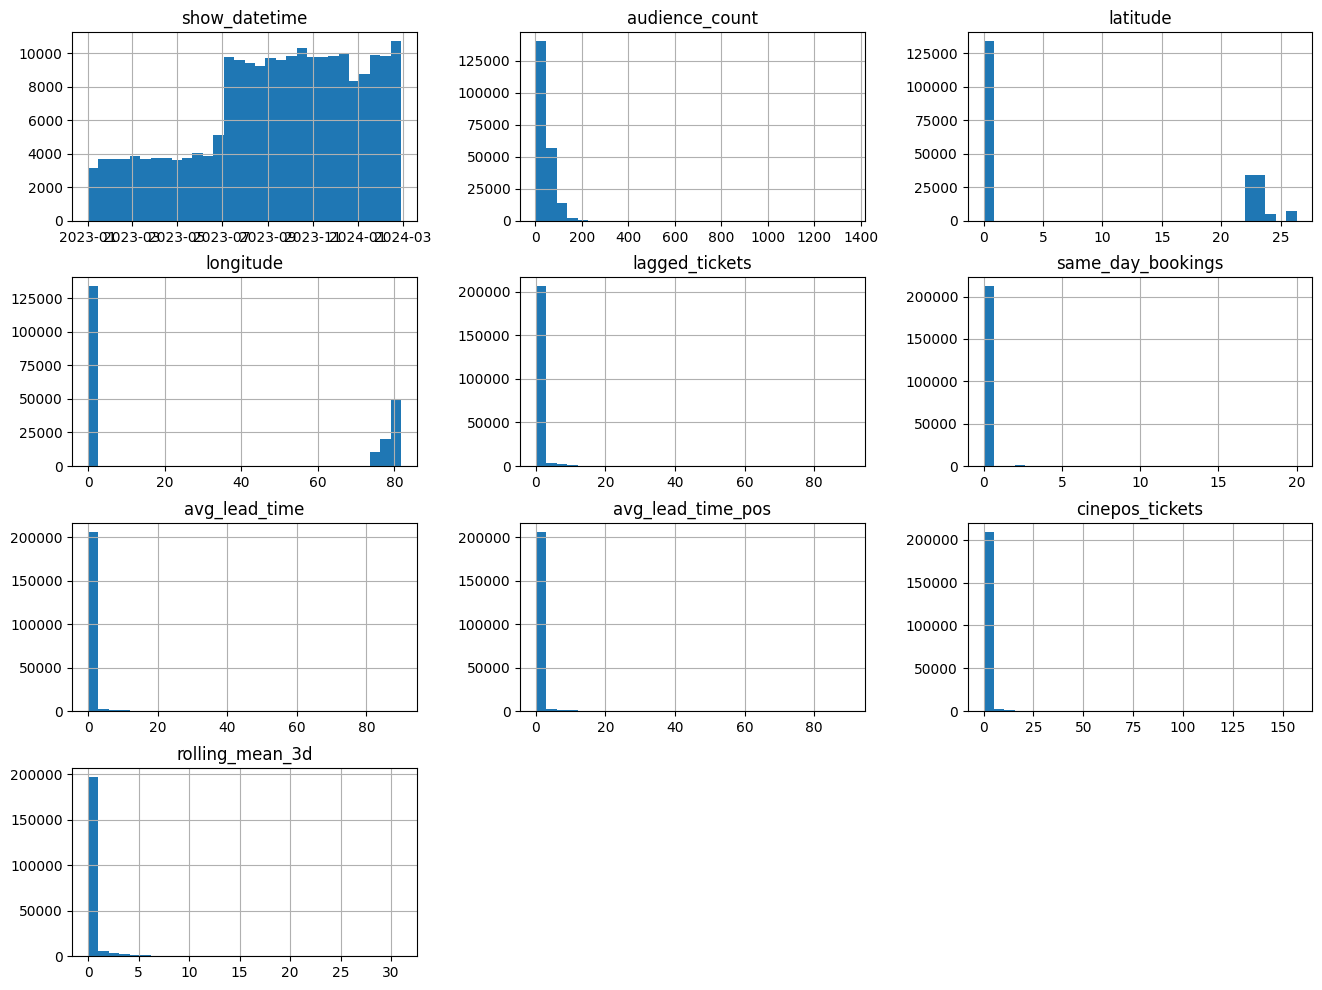

In [89]:
df_features.hist(bins=30,figsize=(16,12))
plt.show()

In [90]:
numerical_features= df_features.select_dtypes(include=['int64','float64'])
numerical_features

,audience_count,latitude,longitude,lagged_tickets,same_day_bookings,avg_lead_time,avg_lead_time_pos,cinepos_tickets,rolling_mean_3d
0,50,23.00441,79.934515,0.0,0.0,0.0,0.0,0.0,0.0
1,64,23.00441,79.934515,0.0,0.0,0.0,0.0,0.0,0.0
2,58,23.00441,79.934515,0.0,0.0,0.0,0.0,0.0,0.0
3,44,23.00441,79.934515,0.0,0.0,0.0,0.0,0.0,0.0
4,12,23.00441,79.934515,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
214041,16,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
214042,8,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
214043,16,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
214044,16,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

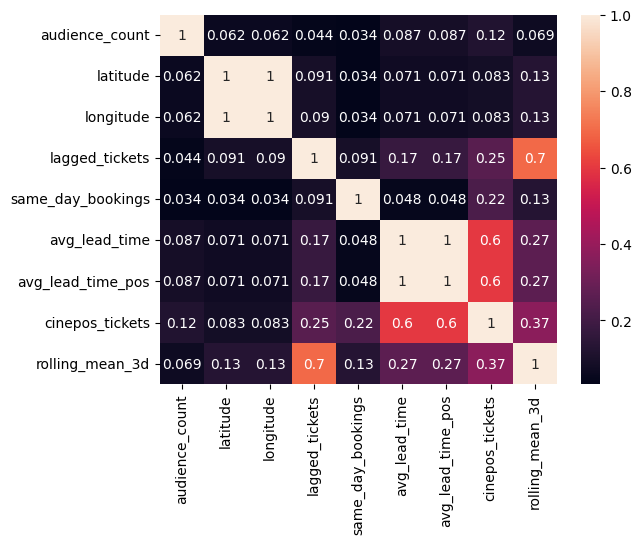

In [91]:
import seaborn as sns

correlation_matrix = df_features[numerical_features.columns].corr()
sns.heatmap(correlation_matrix,annot=True)

# Feature Engineering

In [92]:
df_features = df_features.copy()

# Imputing with the mean, grouped by book_theater_id
df_features.loc[:, 'latitude'] = df_features.groupby('book_theater_id')['latitude'].transform(lambda x: x.replace(0, x.mean()))
df_features.loc[:, 'longitude'] = df_features.groupby('book_theater_id')['longitude'].transform(lambda x: x.replace(0, x.mean()))

# Extracting date features
df_features.loc[:, 'months'] = df_features['show_datetime'].dt.month
df_features.loc[:, 'week_of_year'] = df_features['show_datetime'].dt.isocalendar().week.astype(int)
df_features.loc[:, 'day_of_month'] = df_features['show_datetime'].dt.day
df_features.loc[:,'years'] = df_features['show_datetime'].dt.year

# 'is_weekend' feature
df_features.loc[:, 'is_weekend'] = df_features['show_datetime'].dt.weekday >= 5

In [93]:
df_features.head()

,book_theater_id,show_datetime,audience_count,day_of_week,theater_type,theater_area,latitude,longitude,lagged_tickets,same_day_bookings,avg_lead_time,avg_lead_time_pos,cinepos_tickets,rolling_mean_3d,months,week_of_year,day_of_month,years,is_weekend
0,book_00001,2023-01-13,50,Friday,Drama,Area_002,23.00441,79.934515,0.0,0.0,0.0,0.0,0.0,0.0,1,2,13,2023,False
1,book_00001,2023-01-14,64,Saturday,Drama,Area_002,23.00441,79.934515,0.0,0.0,0.0,0.0,0.0,0.0,1,2,14,2023,True
2,book_00001,2023-01-15,58,Sunday,Drama,Area_002,23.00441,79.934515,0.0,0.0,0.0,0.0,0.0,0.0,1,2,15,2023,True
3,book_00001,2023-01-16,44,Monday,Drama,Area_002,23.00441,79.934515,0.0,0.0,0.0,0.0,0.0,0.0,1,3,16,2023,False
4,book_00001,2023-01-18,12,Wednesday,Drama,Area_002,23.00441,79.934515,0.0,0.0,0.0,0.0,0.0,0.0,1,3,18,2023,False


In [94]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213871 entries, 0 to 214045
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   book_theater_id    213871 non-null  object        
 1   show_datetime      213871 non-null  datetime64[ns]
 2   audience_count     213871 non-null  int64         
 3   day_of_week        213871 non-null  object        
 4   theater_type       213871 non-null  object        
 5   theater_area       213871 non-null  object        
 6   latitude           213871 non-null  float64       
 7   longitude          213871 non-null  float64       
 8   lagged_tickets     213871 non-null  float64       
 9   same_day_bookings  213871 non-null  float64       
 10  avg_lead_time      213871 non-null  float64       
 11  avg_lead_time_pos  213871 non-null  float64       
 12  cinepos_tickets    213871 non-null  float64       
 13  rolling_mean_3d    213871 non-null  float64      

# Models 

In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor


X = df_features.drop(columns=['audience_count'])
y = df_features['audience_count']


ids = X[['book_theater_id', 'show_datetime']].copy()

X = X.drop(columns=['show_datetime']) 

num_features = [
    'latitude',
    'longitude',
    'lagged_tickets',
    'same_day_bookings',
    'avg_lead_time',
    'avg_lead_time_pos',
    'cinepos_tickets',
    'rolling_mean_3d',
    'months',
    'week_of_year',
    'years'
]
cat_features = ["theater_type", "theater_area", "day_of_week","is_weekend",'book_theater_id']

for col in cat_features:
    X[col] = X[col].astype(str)

X_train, X_test, y_train, y_test, ids_train, ids_test = train_test_split(
    X, y, ids, test_size=0.2, random_state=42)

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("cat", cat_transformer, cat_features)
    ]
)



print('finished doing encoding')
print('\n Starting the model prep')


models = {
    "RFregressor": RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    n_jobs=-1,
    random_state=42
    ),
    "XGBoost": XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=5,
        min_child_weight=3,
        subsample=0.8,
        colsample_bytree=0.8,
        gamma=0.2,
        reg_lambda=1.0,
        tree_method="hist",
        random_state=42,
        n_jobs=-1
    ),
    "LightGBM": LGBMRegressor(
    n_estimators=700,         
    learning_rate=0.035,      
    num_leaves=60,           
    max_depth=-1,
    subsample=0.85,          
    colsample_bytree=0.85,
    reg_lambda=1.5,         
    min_child_samples=25,    
    random_state=42,
    n_jobs=-1
)
}

results = {}


df_ts = df_features.sort_values("show_datetime")

train_mask = X_train.index
test_mask = X_test.index

y_train_ts = df_ts.loc[train_mask, "audience_count"].sort_index()
y_test_ts  = df_ts.loc[test_mask, "audience_count"].sort_index()


# Fit ARIMA (p,d,q)
arima_order = (3, 1, 2)


arima_model = ARIMA(y_train_ts, order=arima_order)
arima_fit = arima_model.fit()
# Forecast for test period length

arima_train_mse = mean_squared_error(y_train_ts, arima_fit.fittedvalues)
arima_train_rmse = np.sqrt(arima_train_mse)
arima_train_r2 = r2_score(y_train_ts, arima_fit.fittedvalues)


forecast = arima_fit.forecast(steps=len(y_test_ts))
# Metrics
arima_mse = mean_squared_error(y_test_ts, forecast)
arima_test_rmse = np.sqrt(arima_mse)
arima_test_r2 = r2_score(y_test_ts, forecast)

results["ARIMA"] = {
    "Train_RMSE": arima_train_rmse,     
    "Train_R2": arima_train_r2,
    "Test_RMSE": arima_test_rmse,
    "Test_R2": arima_test_r2
    }

print("ARIMA Model Results:")
print(f"  Test ➜ RMSE: {arima_test_rmse:.3f} | R²: {arima_test_r2:.3f}")



for name, model in models.items():
    pipe = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])
    print(f"Training {name} ...")
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)
    test_rmse= np.sqrt(mse)

    y_train_pred = pipe.predict(X_train)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse= np.sqrt(train_mse)

    results[name] = {
        "Train_RMSE": train_rmse,
        "Train_R2": train_r2,
        "Test_RMSE": test_rmse,
        "Test_R2": test_r2
    }
    
    print(f"{name}")
    print(f"  Train ➜ RMSE: {train_rmse:.3f} | R²: {train_r2:.3f}")
    print(f"  Test  ➜ RMSE: {test_rmse:.3f} | R²: {test_r2:.3f}")
    

finished doing encoding

 Starting the model prep


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

ARIMA Model Results:
  Test ➜ RMSE: 42.549 | R²: -0.772
Training RFregressor ...
RFregressor
  Train ➜ RMSE: 29.709 | R²: 0.192
  Test  ➜ RMSE: 28.994 | R²: 0.177
Training XGBoost ...
XGBoost
  Train ➜ RMSE: 27.193 | R²: 0.323
  Test  ➜ RMSE: 26.379 | R²: 0.319
Training LightGBM ...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2597
[LightGBM] [Info] Number of data points in the train set: 171096, number of used features: 916
[LightGBM] [Info] Start training from score 41.689905

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

In [96]:
df_res= pd.DataFrame(results).T
df_res

,Train_RMSE,Train_R2,Test_RMSE,Test_R2
ARIMA,25.599064,0.400247,42.548532,-0.772404
RFregressor,29.709441,0.192183,28.993668,0.177000
XGBoost,27.193033,0.323233,26.378622,0.318764
LightGBM,22.653012,0.530348,21.832595,0.533336


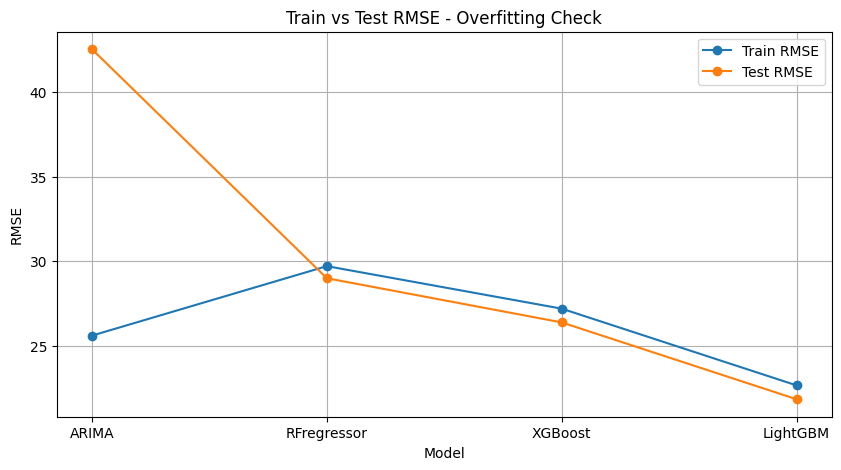

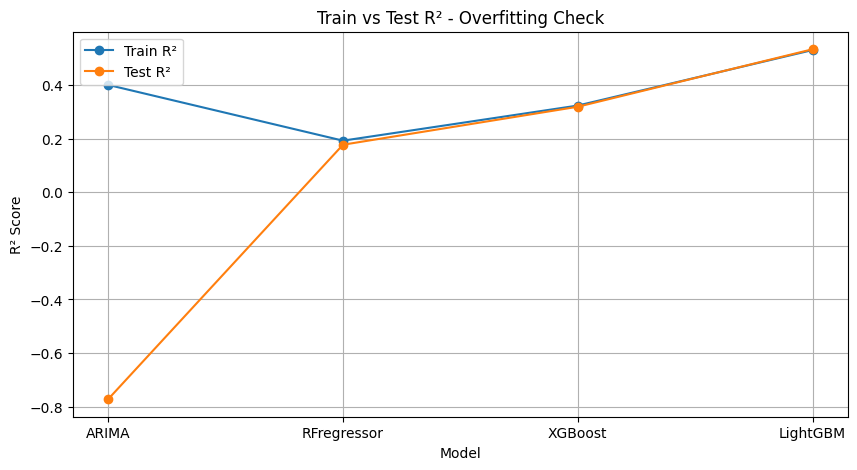

In [97]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,5))
plt.plot(df_res.index, df_res["Train_RMSE"], marker="o", label="Train RMSE")
plt.plot(df_res.index, df_res["Test_RMSE"], marker="o", label="Test RMSE")
plt.title("Train vs Test RMSE - Overfitting Check")
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10,5))
plt.plot(df_res.index, df_res["Train_R2"], marker="o", label="Train R²")
plt.plot(df_res.index, df_res["Test_R2"], marker="o", label="Test R²")
plt.title("Train vs Test R² - Overfitting Check")
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.legend()
plt.grid(True)
plt.show()


In [98]:
y_pred.shape

(42775,)

In [99]:
X_test.head()

,book_theater_id,day_of_week,theater_type,theater_area,latitude,longitude,lagged_tickets,same_day_bookings,avg_lead_time,avg_lead_time_pos,cinepos_tickets,rolling_mean_3d,months,week_of_year,day_of_month,years,is_weekend
168383,book_00655,Monday,0,0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,12,49,4,2023,False
180493,book_00700,Friday,0,0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,8,34,25,2023,False
174451,book_00679,Tuesday,0,0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,7,28,11,2023,False
12281,book_00050,Wednesday,Other,Area_008,22.495681,77.015883,0.0,0.0,0.0,0.0,0.0,0.0,10,40,4,2023,False
13666,book_00056,Friday,Other,Area_028,22.068898,76.237225,0.0,0.0,0.0,0.0,0.0,0.0,2,7,16,2024,False


In [100]:
print("X_test shape:", X_test.shape)
print("y_pred shape:", y_pred.shape)
print("df_features shape:", df_features.shape)

X_test shape: (42775, 17)
y_pred shape: (42775,)
df_features shape: (213871, 19)


# Hyper-Parameter Tuning

In [103]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

models_to_tune = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, objective="reg:squarederror"),
    "LightGBM": LGBMRegressor(random_state=42)
}

tuned_results = {}
best_estimators = {}

print("Starting Hyperparameter Tuning using RandomizedSearchCV \n")

for name, model in models_to_tune.items():
    print(f"\nTuning {name}...")

    if name == "Random Forest":
       param_dist = {
           'regressor__n_estimators': randint(50, 100),
           'regressor__max_depth': randint(5, 10),
           'regressor__min_samples_split': randint(2, 5),
           'regressor__min_samples_leaf': randint(1, 5),
           'regressor__bootstrap': [True]
       }

    elif name == "XGBoost":
        param_dist = {
            'regressor__n_estimators': randint(100, 600),
            'regressor__learning_rate': uniform(0.01, 0.3),
            'regressor__max_depth': randint(3, 12),
            'regressor__subsample': uniform(0.6, 0.4),
            'regressor__colsample_bytree': uniform(0.6, 0.4),
            'regressor__min_child_weight': randint(1, 10)
        }

    elif name == "LightGBM":
        param_dist = {
            'regressor__n_estimators': randint(100, 600),
            'regressor__learning_rate': uniform(0.01, 0.3),
            'regressor__max_depth': randint(-1, 15),
            'regressor__num_leaves': randint(20, 150),
            'regressor__subsample': uniform(0.6, 0.4),
            'regressor__colsample_bytree': uniform(0.6, 0.4)
        }

   
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

   
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_dist,
        n_iter=3,
        cv=2,
        scoring='neg_mean_squared_error',   # For regression
        verbose=1,
        n_jobs=-1,
        random_state=42
    )

    random_search.fit(X_train, y_train)

    best_estimators[name] = random_search.best_estimator_
    tuned_results[name] = {
        'Best CV MSE': -random_search.best_score_,
        'Best Parameters': random_search.best_params_
    }

    print(f" Best parameters for {name}: {random_search.best_params_}")
    print(f" Best CV MSE for {name}: {-random_search.best_score_:.4f}")

print("\nHyperparameter Tuning Completed!")



print("\nTest Set Evaluation of Best Models\n")

for name, best_model in best_estimators.items():
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)

    print(f"{name} Test Metrics:")
    print(f" RMSE: {rmse:.4f}, R²: {r2:.4f}")


Starting Hyperparameter Tuning using RandomizedSearchCV 


Tuning Random Forest...
Fitting 2 folds for each of 3 candidates, totalling 6 fits
 Best parameters for Random Forest: {'regressor__bootstrap': True, 'regressor__max_depth': 9, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 4, 'regressor__n_estimators': 68}
 Best CV MSE for Random Forest: 979.0132

Tuning XGBoost...
Fitting 2 folds for each of 3 candidates, totalling 6 fits
 Best parameters for XGBoost: {'regressor__colsample_bytree': 0.608233797718321, 'regressor__learning_rate': 0.3009729556485983, 'regressor__max_depth': 8, 'regressor__min_child_weight': 2, 'regressor__n_estimators': 291, 'regressor__subsample': 0.996884623716487}
 Best CV MSE for XGBoost: 555.5075

Tuning LightGBM...
Fitting 2 folds for each of 3 candidates, totalling 6 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.049740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And 

In [104]:
X_test['show_datetime'] = pd.to_datetime(
    dict(year=X_test['years'], month=X_test['months'], day=X_test['day_of_month']),
    errors='coerce'
)


In [105]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42775 entries, 168383 to 113301
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   book_theater_id    42775 non-null  object        
 1   day_of_week        42775 non-null  object        
 2   theater_type       42775 non-null  object        
 3   theater_area       42775 non-null  object        
 4   latitude           42775 non-null  float64       
 5   longitude          42775 non-null  float64       
 6   lagged_tickets     42775 non-null  float64       
 7   same_day_bookings  42775 non-null  float64       
 8   avg_lead_time      42775 non-null  float64       
 9   avg_lead_time_pos  42775 non-null  float64       
 10  cinepos_tickets    42775 non-null  float64       
 11  rolling_mean_3d    42775 non-null  float64       
 12  months             42775 non-null  int32         
 13  week_of_year       42775 non-null  int64         
 14  day_o

In [106]:
print("Unique combinations:", df_features[['book_theater_id', 'show_datetime']].drop_duplicates().shape)

Unique combinations: (213871, 2)


In [107]:
submission_copy = sample_subm.copy()
submission_copy[['IDs','Date']] = submission_copy['ID'].str.rsplit('_',n=1,expand=True)
submission_copy.drop('ID', axis=1, inplace=True)

In [108]:
submission_copy

,audience_count,IDs,Date
0,0,book_00001,2024-03-01
1,0,book_00001,2024-03-02
2,0,book_00001,2024-03-03
3,0,book_00001,2024-03-04
4,0,book_00001,2024-03-06
...,...,...,...
38057,0,book_00829,2024-04-18
38058,0,book_00829,2024-04-19
38059,0,book_00829,2024-04-20
38060,0,book_00829,2024-04-21


# Final Submission 


In [110]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

df_predict = sample_subm.copy()             

if 'ID' in df_predict.columns and 'Date' not in df_predict.columns:
    df_predict[['book_theater_id', 'show_datetime']] = df_predict['ID'].str.rsplit('_', n=1, expand=True)
else:
    df_predict[['book_theater_id']] = df_predict['ID'].str.rsplit('_', n=1, expand=True)[[0]]
    df_predict['show_datetime'] = df_predict['Date']


df_predict['show_datetime'] = pd.to_datetime(df_predict['show_datetime'])     

df_predict['merge_date'] = df_predict['show_datetime'].dt.date                


dates_info['show_datetime'] = pd.to_datetime(dates_info['show_datetime'])

df_predict = df_predict.merge(dates_info, left_on='show_datetime', right_on='show_datetime', how='left')

# merge theatre meta
df_predict = df_predict.merge(booknow_th, on='book_theater_id', how='left')


booking_features['new_book_date'] = pd.to_datetime(booking_features['new_book_date']).dt.date

df_predict = df_predict.merge(
    booking_features[['book_theater_id', 'new_book_date', 'lagged_tickets']],
    left_on=['book_theater_id', 'merge_date'],
    right_on=['book_theater_id', 'new_book_date'],
    how='left'
)


if 'same_day_bookings' in globals():
    same_day_bookings['show_datetime'] = pd.to_datetime(same_day_bookings['show_datetime'])
    # merge by datetime
    df_predict = df_predict.merge(
        same_day_bookings,
        on=['book_theater_id','show_datetime'],
        how='left'
    )


df_predict = df_predict.drop(columns=['merge_date','new_book_date'], errors='ignore')
df_predict = df_predict.fillna(0)


raw_num_features = [
    'latitude','longitude','lagged_tickets','same_day_bookings','avg_lead_time',
    'avg_lead_time_pos','cinepos_tickets','rolling_mean_3d','months','week_of_year','years'
]
raw_cat_features = ["theater_type","theater_area","day_of_week","is_weekend",'book_theater_id']


for c in raw_num_features + raw_cat_features:
    if c not in df_predict.columns:
        if c in raw_cat_features:
            df_predict[c] = 'unknown'
        else:
            df_predict[c] = 0


for c in raw_cat_features:
    df_predict[c] = df_predict[c].astype(str)


X_predict = df_predict[ raw_num_features + raw_cat_features ].copy()

X_full = df_features[ raw_num_features + raw_cat_features ].copy()
y_full = df_features['audience_count'].copy()


for c in raw_cat_features:
    X_full[c] = X_full[c].astype(str)


num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)   
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, raw_num_features),
        ("cat", cat_transformer, raw_cat_features)
    ],
    remainder='drop'
)


final_xgb = XGBRegressor(
    n_estimators=291,
    learning_rate=0.3009729556485983,
    max_depth=8,
    min_child_weight=2,
    subsample=0.996884623716487,
    colsample_bytree=0.608233797718321,
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)



final_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', final_xgb)])

print("Training final XGBoost on full training set...")
final_pipe.fit(X_full, y_full)     # (X_train,y_train)
print("Predicting submission set...")
preds = final_pipe.predict(X_predict)        # (y_pred = .....(X_test))    


preds = np.maximum(0, np.round(preds)).astype(int)


submission_df = sample_subm.copy()

submission_df['audience_count'] = preds


if 'Date' in submission_df.columns:
    submission_df['Date'] = pd.to_datetime(submission_df['Date']).dt.strftime('%Y-%m-%d')
else:
    submission_df['Date'] = submission_df['ID'].str.rsplit('_', n=1).str[1]
    submission_df['Date'] = pd.to_datetime(submission_df['Date']).dt.strftime('%Y-%m-%d')

# Final csv
submission_df = submission_df[['ID','audience_count']]
submission_df.to_csv("submission.csv", index=False)
print("submission.csv written with", submission_df.shape[0], "rows")


Training final XGBoost on full training set...
Predicting submission set...
submission.csv written with 38062 rows


In [111]:
submission_df.head()

,ID,audience_count
0,book_00001_2024-03-01,44
1,book_00001_2024-03-02,47
2,book_00001_2024-03-03,46
3,book_00001_2024-03-04,40
4,book_00001_2024-03-06,49


# Milestones

## Milestone 1

In [112]:
# What is the shape of the dataset named booknow_booking?
booknow_book.shape

(68336, 4)

In [114]:
# How many columns are of type Object in the dataset named cinePOS_theaters?

ctypes=cinepos_th.dtypes
print((ctypes == "object").sum())

3


In [115]:
# Which of the following theater types is the most frequent in the dataset
# named booknow_theaters?

booknow_th['theater_type'].mode()

0    Other
Name: theater_type, dtype: object

In [116]:
# How many distinct theaters are present in the dataset named cinePOS_booking?

cinepos_book['cine_theater_id'].nunique()

13161

In [117]:
# Combine the datasets booknow_booking and booknow_theaters. What is the shape of this dataset?
# Hint: Read about inner join for dataframes and its implementation using Pandas

# Note: If the dataset has x rows & y columns, enter your answer as (x,y)

book_combined = booknow_th.merge(booknow_book,on="book_theater_id",how="inner")
book_combined.shape

(36899, 8)

In [118]:
# Based on the combined dataset obtained in the previous question,
# how many distinct areas are the theaters located in?

book_combined['theater_area'].nunique()

50

In [119]:
# Combine the datasets movie_theater_id_relation, cinePOS_booking and cinePOS_theaters. 
# Enter the column names containing missing values as comma seperated values

c_book_theat = cinepos_book.merge(cinepos_th,on="cine_theater_id",how="inner")
cine_book_theater_booknow_rel = c_book_theat.merge(movie_id,on="cine_theater_id",how="inner")
cine_book_theater_booknow_rel.isnull().sum()[cine_book_theater_booknow_rel.isnull().sum()>0]

latitude     9307
longitude    9307
dtype: int64

In [120]:
# Enter the date range spanned in the dataset named booknow_booking.
# Hint: Find the earliest and latest date for which data is available in this dataset.

# Note: Enter the answer as "dd-mm-yyyy to dd-mm-yyyy". 

booknow_book['show_datetime'] = pd.to_datetime(booknow_book['show_datetime'])
booknow_book['booking_datetime'] = pd.to_datetime(booknow_book['booking_datetime'])

start_date = booknow_book[['show_datetime', 'booking_datetime']].min().min().strftime('%d-%m-%y')
end_date = booknow_book[['show_datetime', 'booking_datetime']].max().max().strftime('%d-%m-%y')
print(start_date, "to", end_date)

01-01-23 to 28-02-24


In [121]:
# Enter the date range spanned in the test dataset (sample_submission).
# Hint: Find the earliest and latest date for which data is available in this dataset.

# Note: Enter the answer as "dd-mm-yyyy to dd-mm-yyyy".

sample_subm['date']=sample_subm['ID'].apply(lambda x: x.split("_")[2])
sample_subm['date'] = pd.to_datetime(sample_subm['date'])
print(sample_subm['date'].min().strftime('%d-%m-%y') ,"to",sample_subm['date'].max().strftime('%d-%m-%y'))

01-03-24 to 22-04-24


## Milestone 3

For this milestone, only the booknow_visits.csv file is to be used. Using the show_date column, create new columns for day, month, year and dayofyear. Once the new columns are created, drop the show_date column

Split the data into X & y with the target variable audience_count as y and the remaining features as X. 

Split the dataset so that 20% of it is kept for validation. Ensure the split preserves the time series nature of the dataset. This data will be referred to as X_train, X_test and y_train, y_test

In [122]:
# Q.1 : What is the shape of X_train after making the said changes?

df= booknow_visit.copy()

df['show_date'] = pd.to_datetime(df['show_date'])
df['day'] = df['show_date'].dt.day
df['month'] = df['show_date'].dt.month
df['year'] = df['show_date'].dt.year
df['dayofyear'] = df['show_date'].dt.dayofyear
df.drop(columns=['show_date'], inplace=True)

# Split into X, y
X = df.drop(columns=['audience_count'])
y = df['audience_count']

# Time-based 80–20 split
split_index = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# Output shape
print(X_train.shape)

(171236, 5)


Use MinMaxScaler for the numerical columns & OneHotEncoding for the categorical columns. These transformations are to be applied on both the train & test datasets. Answer all the questions that follow.

In [123]:
# Q.2 : Use LinearSVR for training and enter the r2_score obtained on the test dataset. Upto 3 decimal places

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score


num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', MinMaxScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# Pipeline with LinearSVR
model = Pipeline([
    ('preprocess', preprocessor),
    ('svr', LinearSVR(random_state=42, max_iter=10000))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R2 Score:", round(r2, 3))



R2 Score: -0.002


In [124]:
# Q.3 : Use TruncatedSVD with n_components = 4 and train LinearSVR again. What is the mean absolute error obtained on the training data? Upto 3 decimal places

from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_absolute_error

model = Pipeline([
    ('preprocess', preprocessor),
    ('svd', TruncatedSVD(n_components=4, random_state=42)),
    ('svr', LinearSVR(random_state=42, max_iter=10000))
])


model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)

# MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_train, y_train_pred)
print("Mean Absolute Error:", round(mae, 3))

Mean Absolute Error: 24.137


In [125]:
# Q.4 : Based on the previous question, what is the r2_score obtained on the test data? Upto 3 decimal places

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R2 Score:", round(r2, 3))

R2 Score: -0.028


In [126]:
# Q.5 : Use SelectKBest with k = 2 , score_func = mutual_info_regression.  Based on attributes output by SelectKBest, what is the maximum score obtained?

from sklearn.feature_selection import SelectKBest, mutual_info_regression

X = df.drop(columns=['audience_count'])
X_numeric = X.select_dtypes(include=['int64', 'float64'])

if X_numeric.shape[1] == 0:
    X_numeric = X[['day','month','year','dayofyear']]

selector = SelectKBest(score_func=mutual_info_regression, k=2)
selector.fit(X_numeric, y)

# Maximum score among selected features
selected_scores = selector.scores_[selector.get_support()]
max_score = selected_scores.max()
print(f"Maximum score: {max_score:.3f}")

Maximum score: 0.003


In [127]:
# Q.6 : Based on the previous question, what is the mean value of scores?

mean_score = selector.scores_.mean()
print(f"Mean score: {mean_score:.3f}")

Mean score: 0.002
